In [10]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
pd.set_option('display.max_rows',50)

In [11]:
# Create a path to the csv and read it into a Pandas DataFrame
#csv_path = "Assessor_Historical_Secured_Property_Tax_Rolls.csv"
csv_path = "combine_updated.csv"
rent_path = "../Rent Data/rent.csv"
home_df = pd.read_csv(csv_path, encoding='utf8', engine='python')
rent_df = pd.read_csv(rent_path, encoding='utf8', engine='python')

In [12]:
#Changing from columns to rows
my_col_names = list(rent_df.columns.values)[4:11]
melted_df = pd.melt(rent_df,id_vars=["Region Name","Region Type","Data Type"],
                    value_vars=my_col_names, var_name="Year",value_name="Yearly Rent Price")

In [13]:
melted_df.head()

,Region Name,Region Type,Data Type,Year,Yearly Rent Price
0,Bayview,neighborhood,All Homes,2011,30723
1,Bernal Heights,neighborhood,All Homes,2011,34471
2,Buena Vista,neighborhood,All Homes,2011,42407
3,Corona Heights,neighborhood,All Homes,2011,41051
4,Cow Hollow,neighborhood,All Homes,2011,52856


In [14]:
#changing the type 
melted_df["Year"] = melted_df["Year"].astype("int64")

In [15]:
#merging two data frames
rent_df2 = pd.merge(melted_df,rent_df.loc[:,["Region Name","Region Type",
                                             "Data Type","City","Lat","Lng"]])

In [16]:
rent_df2.head()

,Region Name,Region Type,Data Type,Year,Yearly Rent Price,City,Lat,Lng
0,Bayview,neighborhood,All Homes,2011,30723,San Francisco,37.730416,-122.384424
1,Bayview,neighborhood,All Homes,2012,28821,San Francisco,37.730416,-122.384424
2,Bayview,neighborhood,All Homes,2013,30433,San Francisco,37.730416,-122.384424
3,Bayview,neighborhood,All Homes,2014,35338,San Francisco,37.730416,-122.384424
4,Bayview,neighborhood,All Homes,2015,42870,San Francisco,37.730416,-122.384424


In [17]:
#rename columns to merge on same names
rent_df2 = rent_df2.rename(columns={'Region Name': 'Neighborhood'})
home_df = home_df.rename(columns={'Assessor Neighborhood': 'Neighborhood', 'Closed Roll Year': 'Year'})

In [18]:
#merging
merged_csv = pd.merge(home_df,rent_df2, 
                  how='inner',
                  left_on=["Neighborhood","Year"],
                  right_on=["Neighborhood","Year"])

In [19]:
merged_gb= merged_csv.groupby("Neighborhood").mean()

In [20]:
merged_gb.head()

,Unnamed: 0,Year,Assessed Land Value,Pct Change,Yearly Rent Price,Lat,Lng
Neighborhood,,,,,,,
Bayview,6.5,2013.5,190512.858289,4.170000,35644.333333,37.730416,-122.384424
Bernal Heights,16.5,2013.5,268491.454817,6.726667,43599.666667,37.738950,-122.415201
Buena Vista,26.5,2013.5,487987.841867,5.866667,53112.333333,37.806504,-122.420778
Corona Heights,36.5,2013.5,394108.123417,4.850000,52034.000000,37.761812,-122.443185
Cow Hollow,46.5,2013.5,614482.066967,5.825000,63147.833333,37.798033,-122.439646


In [21]:
#combined.to_csv('combine.csv', sep=',', encoding='utf-8')
merged_csv.to_csv('hp_and_rent.csv', sep=',', encoding='utf-8')
merged_gb.to_csv('hp_and_rent_grouped.csv', sep=',', encoding='utf-8')

In [22]:
merged_csv.head()

,Unnamed: 0,Neighborhood,Year,Assessed Land Value,Pct Change,Region Type,Data Type,Yearly Rent Price,City,Lat,Lng
0,4,Bayview,2011,175691.806133,0.14,neighborhood,All Homes,30723,San Francisco,37.730416,-122.384424
1,5,Bayview,2012,177818.914467,1.21,neighborhood,All Homes,28821,San Francisco,37.730416,-122.384424
2,6,Bayview,2013,182203.741400,2.47,neighborhood,All Homes,30433,San Francisco,37.730416,-122.384424
3,7,Bayview,2014,185691.451367,1.91,neighborhood,All Homes,35338,San Francisco,37.730416,-122.384424
4,8,Bayview,2015,198571.039233,6.94,neighborhood,All Homes,42870,San Francisco,37.730416,-122.384424


In [23]:
import requests
import json
import gmaps
import gmaps.datasets

In [65]:
#Creating a HeatMap to show Neighborhoods Rent Rates  
fig = gmaps.figure()
locations = merged_gb[["Lat", "Lng"]]
weights2 = merged_gb["Yearly Rent Price"]
heat_layer = gmaps.heatmap_layer(locations, weights=weights2, 
                                 point_radius = 25, opacity = 0.7)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [66]:
#Creating a HeatMap to show Neighborhoods Assessed Land Value
fig = gmaps.figure()
locations = merged_gb[["Lat", "Lng"]]
weights = merged_gb["Assessed Land Value"]
heat_layer1 = gmaps.heatmap_layer(locations, weights=weights, point_radius = 15, 
                                  gradient = ["silver","navy"], opacity = 0.5)                                
fig.add_layer(heat_layer1)
fig

Figure(layout=FigureLayout(height='420px'))

In [67]:
#Combining two HeatMaps
fig = gmaps.figure()
fig = gmaps.figure(map_type="SATELLITE")
fig.add_layer(heat_layer)
fig.add_layer(heat_layer1)
fig

Figure(layout=FigureLayout(height='420px'))

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
data = pd.read_csv("hp_and_rent_grouped.csv", encoding='utf8', engine='python')
data.head()

,Neighborhood,Unnamed: 0,Year,Assessed Land Value,Pct Change,Yearly Rent Price,Avg Rent Rate,Lat,Lng
0,Bayview,6.5,2013.5,190512.858289,4.170000,35644.333333,37087.571429,37.730416,-122.384424
1,Bernal Heights,16.5,2013.5,268491.454817,6.726667,43599.666667,45048.428571,37.738950,-122.415201
2,Buena Vista,26.5,2013.5,487987.841867,5.866667,53112.333333,54370.142857,37.806505,-122.420778
3,Corona Heights,36.5,2013.5,394108.123417,4.850000,52034.000000,53150.428571,37.761812,-122.443185
4,Cow Hollow,46.5,2013.5,614482.066967,5.825000,63147.833333,64405.571429,37.798033,-122.439646


In [58]:
airbnb_path = "../Data/Airbnb_listings.csv"
airbnb_df = pd.read_csv(airbnb_path, encoding='utf8', engine='python')
airbnb_df["neighbourhood"].value_counts().head()

Mission                  27934
Western Addition         20746
South of Market          17289
Castro/Upper Market      13250
Downtown/Civic Center    12124
Name: neighbourhood, dtype: int64

In [59]:
airbnb_df.head()

,Unnamed: 0,date,neighbourhood,property type,daily rate,annual rate (USD)
0,0,2016-10,Seacliff,House,$105.00,38325.0
1,1,2016-10,Seacliff,House,$300.00,109500.0
2,2,2016-10,Seacliff,Apartment,$175.00,63875.0
3,3,2016-10,Seacliff,House,$90.00,32850.0
4,4,2016-10,Seacliff,Condominium,$400.00,146000.0


In [60]:
merged_test = pd.merge(merged_gb,airbnb_df, 
                  how='inner',
                  left_on=["Neighborhood"],
                  right_on=["neighbourhood"])

In [61]:
merged_test.head()

,Unnamed: 0_x,Year,Assessed Land Value,Pct Change,Yearly Rent Price,Avg Rent Rate,Lat,Lng,Unnamed: 0_y,date,neighbourhood,property type,daily rate,annual rate (USD)
0,6.5,2013.5,190512.858289,4.17,35644.333333,37087.571429,37.730416,-122.384424,4516,2016-10,Bayview,House,$92.00,33580.0
1,6.5,2013.5,190512.858289,4.17,35644.333333,37087.571429,37.730416,-122.384424,4517,2016-10,Bayview,Townhouse,$80.00,29200.0
2,6.5,2013.5,190512.858289,4.17,35644.333333,37087.571429,37.730416,-122.384424,4518,2016-10,Bayview,House,$75.00,27375.0
3,6.5,2013.5,190512.858289,4.17,35644.333333,37087.571429,37.730416,-122.384424,4519,2016-10,Bayview,House,$149.00,54385.0
4,6.5,2013.5,190512.858289,4.17,35644.333333,37087.571429,37.730416,-122.384424,4520,2016-10,Bayview,House,$136.00,49640.0


In [62]:
merged_gb.head()

,Unnamed: 0,Year,Assessed Land Value,Pct Change,Yearly Rent Price,Avg Rent Rate,Lat,Lng
Neighborhood,,,,,,,,
Bayview,6.5,2013.5,190512.858289,4.170000,35644.333333,37087.571429,37.730416,-122.384424
Bernal Heights,16.5,2013.5,268491.454817,6.726667,43599.666667,45048.428571,37.738950,-122.415201
Buena Vista,26.5,2013.5,487987.841867,5.866667,53112.333333,54370.142857,37.806504,-122.420778
Corona Heights,36.5,2013.5,394108.123417,4.850000,52034.000000,53150.428571,37.761812,-122.443185
Cow Hollow,46.5,2013.5,614482.066967,5.825000,63147.833333,64405.571429,37.798033,-122.439646


In [63]:
merged_csv

,Unnamed: 0,Neighborhood,Year,Assessed Land Value,Pct Change,Region Type,Data Type,Yearly Rent Price,Avg Rent Rate,City,Lat,Lng
0,4,Bayview,2011,175691.806133,0.14,neighborhood,All Homes,30723,37087.571429,San Francisco,37.730416,-122.384424
1,5,Bayview,2012,177818.914467,1.21,neighborhood,All Homes,28821,37087.571429,San Francisco,37.730416,-122.384424
2,6,Bayview,2013,182203.741400,2.47,neighborhood,All Homes,30433,37087.571429,San Francisco,37.730416,-122.384424
3,7,Bayview,2014,185691.451367,1.91,neighborhood,All Homes,35338,37087.571429,San Francisco,37.730416,-122.384424
4,8,Bayview,2015,198571.039233,6.94,neighborhood,All Homes,42870,37087.571429,San Francisco,37.730416,-122.384424
5,9,Bayview,2016,223100.197133,12.35,neighborhood,All Homes,45681,37087.571429,San Francisco,37.730416,-122.384424
6,14,Bernal Heights,2011,228865.782800,3.96,neighborhood,All Homes,34471,45048.428571,San Francisco,37.738950,-122.415201
7,15,Bernal Heights,2012,241607.198400,5.57,neighborhood,All Homes,35739,45048.428571,San Francisco,37.738950,-122.415201
8,16,Bernal Heights,2013,252609.859300,4.55,neighborhood,All Homes,38924,45048.428571,San Francisco,37.738950,-122.415201
9,17,Bernal Heights,2014,270243.422800,6.98,neighborhood,All Homes,43654,45048.428571,San Francisco,37.738950,-122.415201


[]

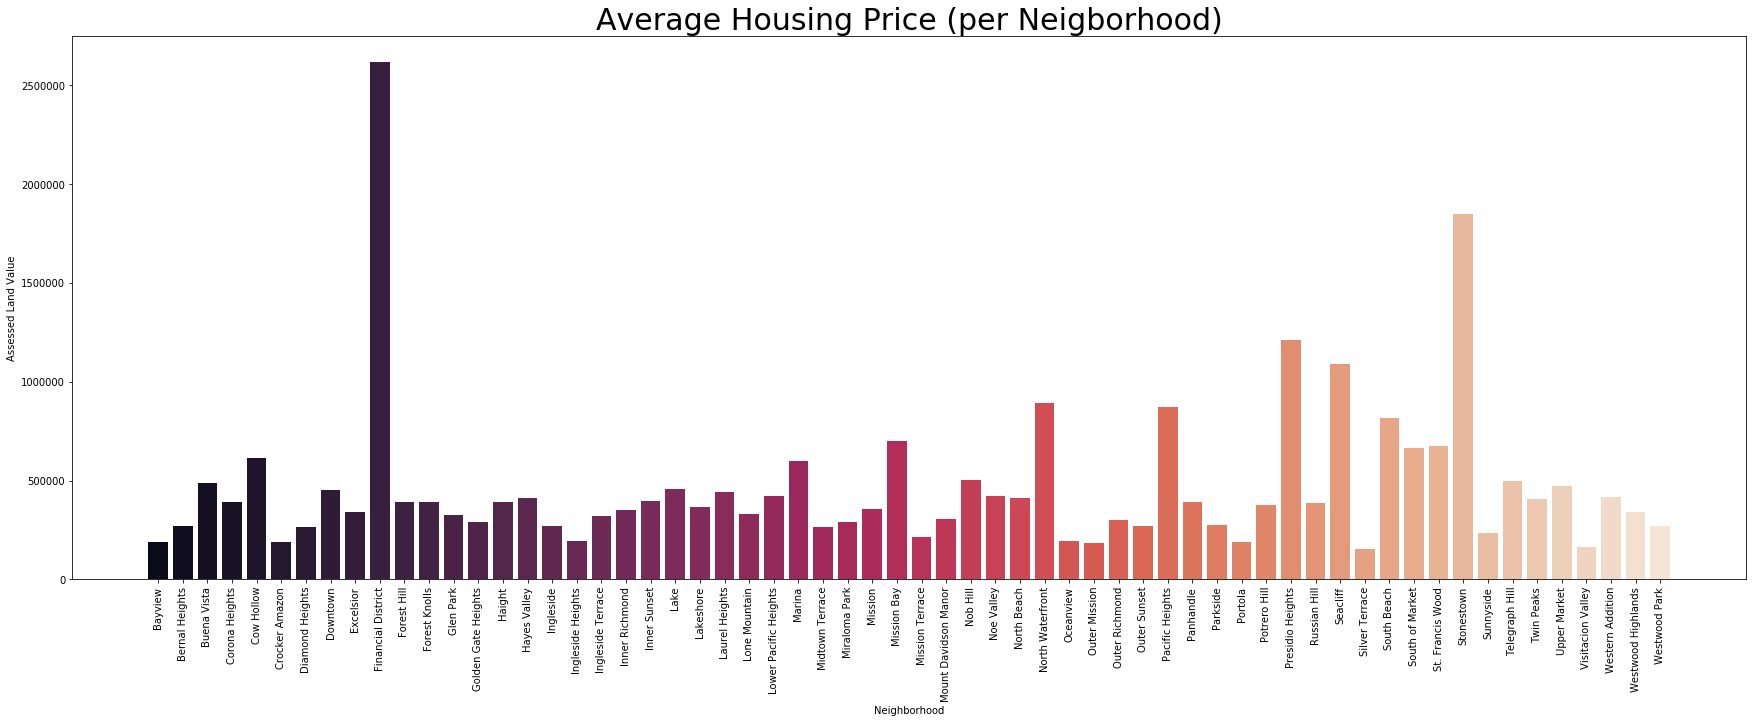

In [97]:
#Using Seaborn to create a graph that will show Average Rent Rate (per Neigborhood)
plot2 = plt.subplots(figsize=(30, 10))
sns.barplot(x = data["Neighborhood"], y = data["Assessed Land Value"], palette="rocket")
plt.xticks(rotation=90)
plt.title("Average Housing Price (per Neigborhood)", fontsize=30)
plt.plot()



[]

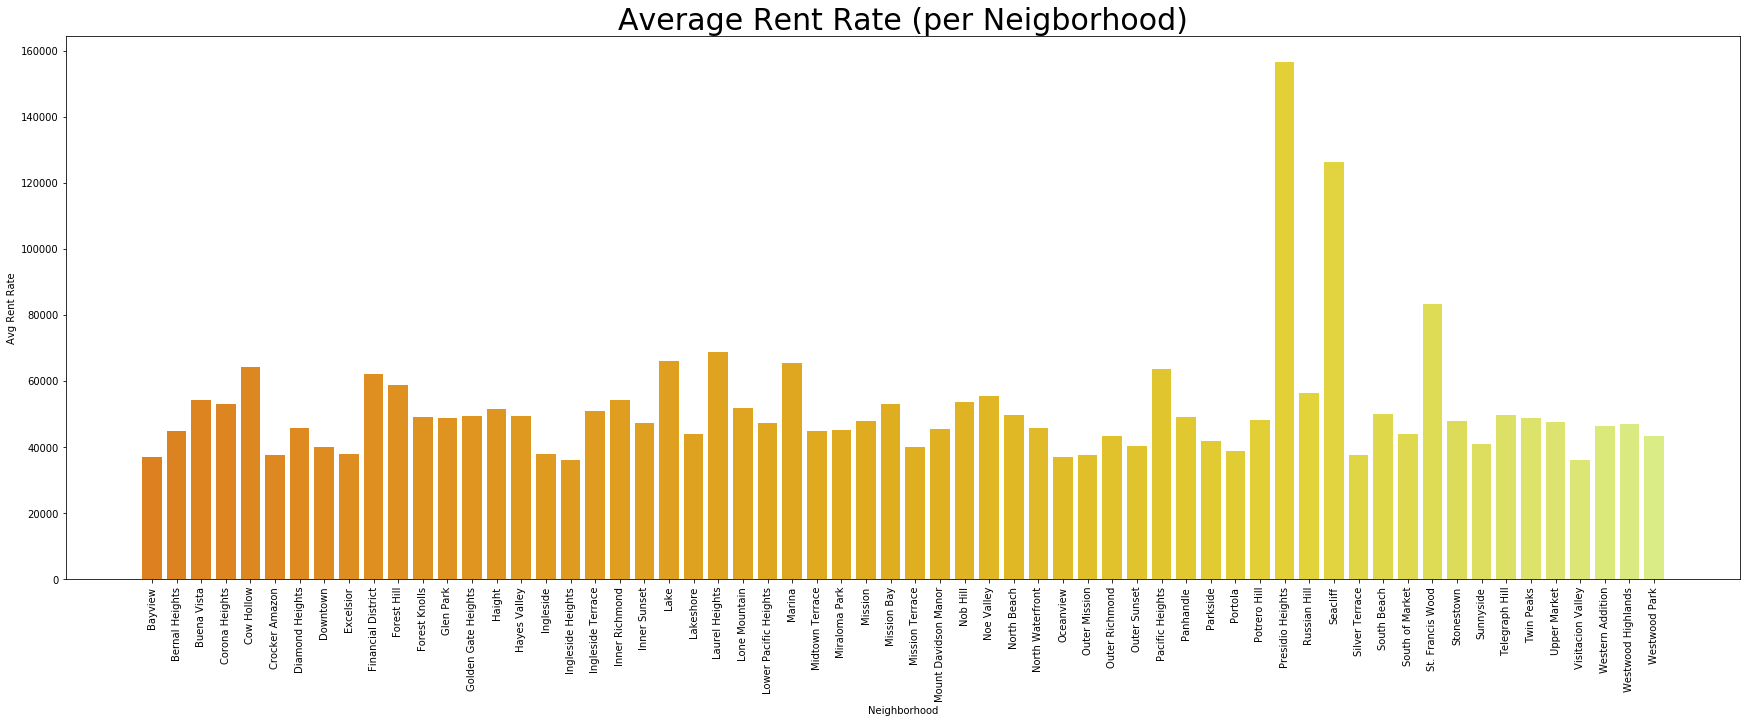

In [88]:
plot1 = plt.subplots(figsize=(30, 10))
sns.barplot(x = data["Neighborhood"], y = data["Avg Rent Rate"], palette="Wistia_r")
plt.xticks(rotation=90)
plt.title("Average Rent Rate (per Neigborhood)", fontsize=30)
plt.plot()
